## Resampling Method

There are 2 type of resampling method

1. Cross-Validation
2. Bootstrap

Resampling is done to perform models-assessment and model-selection

### Cross-Validation

In cross validation we randomly divide the data sets into two halves one is used to fit the statistical model known as training data sets and the other half is used to asses the model known as validation data set.

There are two drawbacks of cross-validation

1. Since we randomly divide the data sets it is possible that for different run we will get different Test MSE which will not give us a clear picture of our model performnce.

2. Since we are only using half of our data to fit our model it does not capture the real form of the data and in that case the validation set tends to overestimate the data sets.

#### Leave-one-out cross validation

Here we fit the model using (n-1) data sets and validate on the one left out observation. We perform this task n times and take the average of all MSE in the end which gives us Test MSE. It addresses the two concerns mentioned above. But there is one drawback in this method that is it is cost expensive since we have to fit the model n times and in case where n is a large number.

#### k-fold cross validation

In this approach we divide our data sets into k equal buckets and fit our model using (k-1) data and test on the left out chunk of data. We repeat this approach k times and averages the MSE from each run to estimates the Test MSE. The obvious benefit is that it doesn't suffer from the limitation of LOOC and is computationally cheap and also takes care of Variance with which LOOC suffers.

### Bootstrap

In Bootstrap we draw samples with replacement to generate different data sets on which we perform our statistical analysis.

In [128]:
# importing required libraries
import pandas as pd
import random

In [129]:
# reading the Auto data set

Auto = pd.read_csv(r'C:\Users\Vikram\Desktop\ISLR\Data\Auto.csv',header='infer', index_col='Column1')

In [130]:
#setting up seed to randomly draw data for cross validation from Auto data set
random.seed(100)

In [131]:
# defining the independent variable.

Auto_x = Auto.drop(['mpg','name'],axis=1)

In [132]:
# randomly splitting data into training and test data set.

Auto_x_train = Auto.drop(['mpg','name'],axis=1).sample(196)
Auto_y_train = Auto.mpg.sample(196)

In [133]:
# columns in Auto data set
Auto.columns, Auto.shape

(Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'year', 'origin', 'name'],
       dtype='object'), (392, 9))

In [134]:
# importing Linear Regression from sklear. We will use Linear regression to study the impact of resampling.

from sklearn.linear_model import LinearRegression

In [135]:
# fitting the Linear Regression model.

reg = LinearRegression()
reg.fit(Auto_x_train, Auto_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [136]:
# importing numpy in order to calculate the mean error produced by our model. As we can see that MSE is -1.072
import numpy as np

np.mean(Auto.mpg - reg.predict(Auto_x))

0.9661936266354951

In [137]:
# generating different random seed to demonstrate the issues of random resampling
random.seed(200)

In [138]:
# drawing our independent and dependent variable randomly with new seed

Auto_x_train1 = Auto.drop(['mpg','name'],axis=1).sample(196)
Auto_y_train1 = Auto.mpg.sample(196)

In [139]:
# fitting Linear Regression on the new data sets

reg1 = LinearRegression()
reg1.fit(Auto_x_train1, Auto_y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [140]:
# calculating the mean error and as visible there is a huge diffrence from -1.07 to 0.144. This tells us the issue which 
# cross validation suffers from which is variablility.

np.mean(Auto.mpg - reg1.predict(Auto_x))

0.5194935571596861

In [141]:
# implementing the Leave-One-Out cross validation from sklearn

from sklearn.model_selection import LeaveOneOut

Auto_looc_X = Auto.drop(['name','mpg'], axis=1)

looc = LeaveOneOut()

looc.get_n_splits(Auto_looc_X)

392

In [142]:
# below is the different combination of indices from our data sets which were split into training and test using LOOC
# implementation

for train_index, test_index in looc.split(Auto_looc_X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = np.array(Auto_looc_X)[train_index], np.array(Auto_looc_X)[test_index]
   y_train, y_test = np.array(Auto.mpg)[train_index], np.array(Auto.mpg)[test_index]
   print(y_train, y_test)

TRAIN: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  25.  24.  25.  26.  21.  10.  10.  11.   9.
 27.  28.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.  12.  13.
 13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.  26.  24.
 25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.  13.  19.
 15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.  27.  13.
 14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.  16.  18.
 18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.  19.  21.
 26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.  19.  15.
 31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.  14.  29.  26.
 26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.  15.  15.  16.
 15.  16.  14.  17.  16.  15.  18.  21.  20.  13.  29.  23.  20.  23.
 24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.  28.  25.  25.
 26.  27.  17.5 16.  15.5 14.5 22.  22.  24.  22.5 29.  24.5 29.  33.
 20.  18.  18.5 17.5

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

 379 380 381 382 383 384 385 386 387 388 389 390 391] TEST: [96]
[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.  12.
 13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.  26.
 24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.  13.
 19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.  27.
 13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  16.  18.
 18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.  19.  21.
 26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.  19.  15.
 31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.  14.  29.  26.
 26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.  15.  15.  16.
 15.  16.  14.  17.  16.  15.  18.  21.  20.  13.  29.  23.  20.  23.
 24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.  28.  25.  25.
 26.  27.  17.5 16.  15.5

[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.  12.
 13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.  26.
 24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.  13.
 19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.  27.
 13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.  16.
 18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.  19.
 21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.  19.
 15.  31.  26.  32.  25.  16.  18.  16.  13.  14.  14.  14.  29.  26.
 26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.  15.  15.  16.
 15.  16.  14.  17.  16.  15.  18.  21.  20.  13.  29.  23.  20.  23.
 24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.  28.  25.  25.
 26.  27.  17.5 16.  15.5 14.5 22.  22.  24.  22.5 29.  24.5 29.  33.
 20.  18.  18.5 17.5

 379 380 381 382 383 384 385 386 387 388 389 390 391] TEST: [164]
[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.  12.
 13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.  26.
 24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.  13.
 19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.  27.
 13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.  16.
 18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.  19.
 21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.  19.
 15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.  14.  29.
 26.  26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.  15.  15.
 16.  15.  16.  14.  17.  16.  15.  18.  21.  20.  29.  23.  20.  23.
 24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.  28.  25.  25.
 26.  27.  17.5 16.  15.

[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.  12.
 13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.  26.
 24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.  13.
 19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.  27.
 13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.  16.
 18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.  19.
 21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.  19.
 15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.  14.  29.
 26.  26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.  15.  15.
 16.  15.  16.  14.  17.  16.  15.  18.  21.  20.  13.  29.  23.  20.
 23.  24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.  28.  25.
 25.  26.  27.  17.5 16.  15.5 14.5 22.  22.  24.  22.5 29.  24.5 29.
 33.  20.  18.  18.5

[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.  12.
 13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.  26.
 24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.  13.
 19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.  27.
 13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.  16.
 18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.  19.
 21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.  19.
 15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.  14.  29.
 26.  26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.  15.  15.
 16.  15.  16.  14.  17.  16.  15.  18.  21.  20.  13.  29.  23.  20.
 23.  24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.  28.  25.
 25.  26.  27.  17.5 16.  15.5 14.5 22.  22.  24.  22.5 29.  24.5 29.
 33.  20.  18.  18.5

 38.  25.  38.  26.  22.  32.  36.  27.  27.  44.  32.  28.  31. ] [20.2]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 22

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.  12.
 13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.  26.
 24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.  13.
 19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.  27.
 13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.  16.
 18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.  19.
 21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.  19.
 15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.  14.  29.
 26.  26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.  15.  15.
 16.  15.  16.  14.  17.  16.  15.  18.  21.  20.  13.  29.  23.  20.
 23.  24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.  28.  25.
 25.  26.  27.  17.5 16.  15.5 14.5 22.  22.  24.  22.5 29.  24.5 29.
 33.  20.  18.  18.5

In [143]:
# implemnting the k-cross validation with k=5 which will split the data set in 5 equal samples and will evaluate the performance.
# As visible the estimates are more stable now and k-cross validation has addressed the issue of variability to some extent.

from sklearn.model_selection import cross_val_score, cross_val_predict

reg_k = LinearRegression()
scores = cross_val_score(reg_k, Auto_x, Auto.mpg, cv=5)
scores

array([0.55691895, 0.68950582, 0.82212138, 0.6795006 , 0.2250594 ])

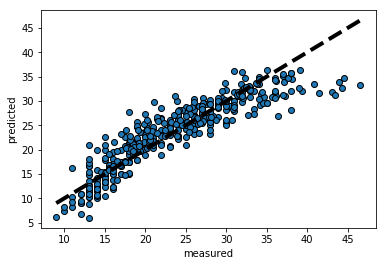

In [144]:
#LOOC
%matplotlib inline
import matplotlib.pyplot as plt

meg_pred =  cross_val_predict(reg_k, Auto_x, Auto.mpg, cv=392)

fig, ax = plt.subplots()
ax.scatter(Auto.mpg, meg_pred, edgecolors=(0,0,0))
ax.plot([Auto.mpg.min(), Auto.mpg.max()], [Auto.mpg.min(),Auto.mpg.max()], 'k--',lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

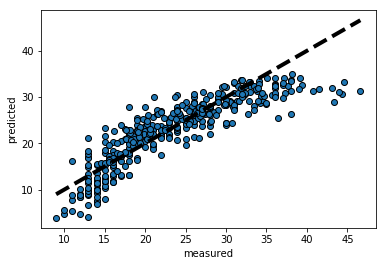

In [145]:
#k-cross validation with k=5
%matplotlib inline
import matplotlib.pyplot as plt

meg_pred =  cross_val_predict(reg_k, Auto_x, Auto.mpg, cv=5)

fig, ax = plt.subplots()
ax.scatter(Auto.mpg, meg_pred, edgecolors=(0,0,0))
ax.plot([Auto.mpg.min(), Auto.mpg.max()], [Auto.mpg.min(),Auto.mpg.max()], 'k--',lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

###### For Bootstrap we can use the random procedure used above with a small addition of 'replacement=True'